# Score prediction


In [2]:
# !pip install tensorflow-gpu

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

In [4]:
# In colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting Data
* 데이터를 불러와봅시다.

In [6]:
xy = np.loadtxt("/content/drive/MyDrive/dataset/example_data/data-01-test-score.csv", #Set data path
                delimiter=',',
                dtype=np.float32)
print(xy)

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print(x_train, y_train)

print(x_train.shape, y_train.shape)


[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83

## make a dataset

In [7]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.batch(batch_size=len(x_train)) # batch_size=8 int형으로 입력하시면 됩니다.


In [8]:
next(iter(dataset))

(<tf.Tensor: shape=(25, 3), dtype=float32, numpy=
 array([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]], dtype=float32)>,
 <tf.Tensor: shape=(25, 1), dtype=float32, numpy=
 array([[152.],
        [185.],
        [180.],
        [196.],
        [142.],
        [101.],
        [149.],
        [115.],
        [175.],
        [164.],
        [141.],
      

In [9]:
for x, y in dataset:
  print(x, y)
  break

tf.Tensor(
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]], shape=(25, 3), dtype=float32) tf.Tensor(
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]], shape=(25, 1), dtype=float32)


# 가설 설정

In [10]:
W = tf.Variable(tf.random.normal([3, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias') # tf.keras.layers.Dense(1)

tf.print(W, b)


[[-1.08416378]
 [-0.0588277578]
 [0.121951602]] [-2.1776197]


In [11]:
def linear_regression(features): # features => X 값이 들어올 예정
    hypothesis  = tf.matmul(features, W) + b
    return hypothesis

print(linear_regression(x_train))

tf.Tensor(
[[ -76.88143 ]
 [ -96.840195]
 [ -93.045876]
 [ -99.82731 ]
 [ -76.667595]
 [ -55.63704 ]
 [ -71.94791 ]
 [ -49.110573]
 [ -90.171616]
 [ -81.21276 ]
 [ -72.2004  ]
 [ -72.86847 ]
 [ -97.495895]
 [ -83.63032 ]
 [ -72.85129 ]
 [ -96.53317 ]
 [ -82.86176 ]
 [ -83.94789 ]
 [ -92.50835 ]
 [ -82.234825]
 [ -85.16259 ]
 [ -89.38589 ]
 [ -81.25922 ]
 [ -80.79821 ]
 [-100.14292 ]], shape=(25, 1), dtype=float32)


# cost 함수 설정


$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

In [12]:
def loss_fn(hypothesis, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.00001)

# 학습

In [13]:
epochs = 5000

for step in range(epochs):
  for features, labels in dataset:
    with tf.GradientTape() as tape:
      pred = linear_regression(features) # 모델의 예측값을 구합니다.
      loss_value = loss_fn(pred, labels)
    grads = tape.gradient(loss_value, [W, b])
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W, b]))
    if step % 100 == 0:
          print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 61111.8555
Iter: 100, Loss: 10.7164
Iter: 200, Loss: 10.4267
Iter: 300, Loss: 10.1555
Iter: 400, Loss: 9.9015
Iter: 500, Loss: 9.6636
Iter: 600, Loss: 9.4406
Iter: 700, Loss: 9.2316
Iter: 800, Loss: 9.0356
Iter: 900, Loss: 8.8516
Iter: 1000, Loss: 8.6790
Iter: 1100, Loss: 8.5170
Iter: 1200, Loss: 8.3648
Iter: 1300, Loss: 8.2218
Iter: 1400, Loss: 8.0875
Iter: 1500, Loss: 7.9612
Iter: 1600, Loss: 7.8424
Iter: 1700, Loss: 7.7307
Iter: 1800, Loss: 7.6256
Iter: 1900, Loss: 7.5266
Iter: 2000, Loss: 7.4335
Iter: 2100, Loss: 7.3457
Iter: 2200, Loss: 7.2631
Iter: 2300, Loss: 7.1852
Iter: 2400, Loss: 7.1118
Iter: 2500, Loss: 7.0426
Iter: 2600, Loss: 6.9773
Iter: 2700, Loss: 6.9157
Iter: 2800, Loss: 6.8576
Iter: 2900, Loss: 6.8028
Iter: 3000, Loss: 6.7510
Iter: 3100, Loss: 6.7021
Iter: 3200, Loss: 6.6559
Iter: 3300, Loss: 6.6123
Iter: 3400, Loss: 6.5711
Iter: 3500, Loss: 6.5322
Iter: 3600, Loss: 6.4954
Iter: 3700, Loss: 6.4606
Iter: 3800, Loss: 6.4276
Iter: 3900, Loss: 6.3965
Iter:

In [14]:
print(W, b)

<tf.Variable 'weight:0' shape=(3, 1) dtype=float32, numpy=
array([[0.23005226],
       [0.62363464],
       [1.184437  ]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-2.169901], dtype=float32)>


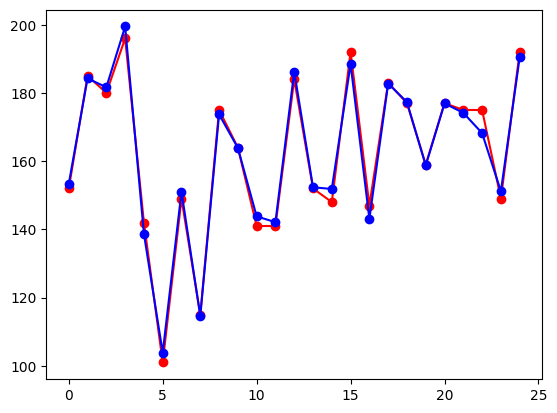

In [15]:
hypothesis= linear_regression(x_train)

plt.plot(y_train, 'o-', color='red')
plt.plot(hypothesis.numpy(), 'o-', color='blue')
plt.show()